<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Two: Exploratory data analysis and feature extraction. </h2>	


<h5> In this section, Compute at least 15 such image features (a method for each), including the following (NOTE: At least 10 of these must be scalar features and 2 matrix-based features): (i) image size, (ii) average of the red-channel intensity, (iii) aspectratio. This will require significant explatoratory research and data analysis. The first one is already implemented for you, and the next two are pre-specified. Additional requirements specfied in pdf. </h5>

In [1]:
%store -r starting_data
%store -r validation_data
import numpy as np
import cv2
import skimage
import matplotlib as plt
import copy
from skimage import feature, color, data
%matplotlib inline

In [2]:
bear = starting_data[starting_data['Encoding'] == 1]

In [4]:
a = copy.copy(bear['Image'].iloc[11])

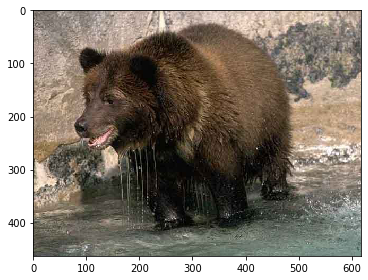

In [5]:
skimage.io.imshow(a)

In [7]:
skimage.feature.canny(a)

ValueError: The parameter `image` must be a 2-dimensional array

In [9]:

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

NameError: name 'gray' is not defined

In [32]:
import copy
a = copy.copy(bear['Image'].iloc[0])

In [33]:
img = a[:, :, ::-1] # convert image from RGB (skimage) to BGR (opencv)

In [34]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

In [35]:
img.shape

(1680, 2100, 3)

In [36]:
len(kp)

7295

In [26]:
img2 = img.copy()

In [12]:
img=cv2.drawKeypoints(gray,kp,img2)

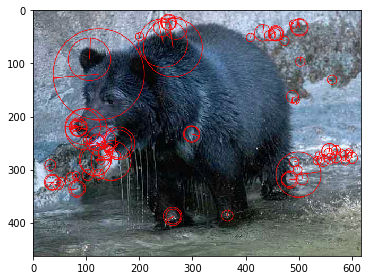

In [30]:
skimage.io.imshow(img)

In [95]:
for i in corners:
    x,y = i.ravel()
    print(img[x][y])

[40 56 69]
[ 91 102 100]
[58 78 96]
[41 65 87]
[74 87 79]
[36 50 69]
[ 81 104 126]
[31 42 56]


IndexError: index 586 is out of bounds for axis 0 with size 463

In [90]:
img.shape

(502, 699, 3)

In [68]:
import cv2

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.03*dst.max()]=[0,0,255]

In [72]:
img.shape

(502, 699, 3)

In [29]:
    bgr_img = img[:, :, ::-1] # RGB -> BGR
    surf = cv2.xfeatures2d.SURF_create(4000)
    kp, des = surf.detectAndCompute(bgr_img,None)
    img2 = img.copy()
    img=cv2.drawKeypoints(img2,kp,None,(255,0,0),4)

In [36]:
kp[0].size

75.0

In [3]:
#image size
def ft0(image):
    return image.size

#average of the red-channel intensity
def ft1(image):
    return image[:, :, 0].mean()
    
#aspectratio
def ft2(image):
    return image.shape[0] / image.shape[1]

#average of the green-channel intensity
def ft3(image):
    return image[:, :, 1].mean()

#average of the blue-channel intensity
def ft4(image):
    return image[:, :, 2].mean()

#Harris Corner Detector, return an array contain Corner score for each pixel
def ft5(image):
    bgr_img = image[:, :, ::-1] # RGB -> BGR
    gray = cv2.cvtColor(bgr_img,cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,2,3,0.04)

    #result is dilated for marking the corners, not important
    dst = cv2.dilate(dst,None)
    return dst

#SIFT
def ft6(image):
    bgr_img = image[:, :, ::-1] # RGB -> BGR
    gray = cv2.cvtColor(bgr_img,cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    kp = sift.detect(gray,None)
    img2 = img.copy()
    img=cv2.drawKeypoints(gray,kp,img2)
    return img

#SURF
def ft7(image):
    bgr_img = image[:, :, ::-1] # RGB -> BGR
    surf = cv2.xfeatures2d.SURF_create(400)
    kp, des = surf.detectAndCompute(bgr_img,None)
    img2 = img.copy()
    img=cv2.drawKeypoints(img2,kp,None,(255,0,0),4)
    return img

#Hough Transform
def ft8(image):
    bgr_img = image[:, :, ::-1] # RGB -> BGR
    image = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

#Haralick texture feature vector
def ft9(image):
    bgr_img = image[:, :, ::-1] # RGB -> BGR
    image = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(image).mean(axis=0)
    return haralick

#Color Histogram
def ft9(image):
    bgr_img = image[:, :, ::-1] # RGB -> BGR
    # convert the image to HSV color-space
    image = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    hist.flatten()
    
def ft10(image):
    return image[:,:,0].std()
    
def ft11(image):
    return image[:,:,1].std()
    
def ft12(image):
    return image[:,:,2].std()
    
def ft13(image):
    return skimage.feature.hog(image, visualize = False, feature_vector = True).mean()
    
def ft14(image):
    return skimage.feature.hog(image, visualize = False, feature_vector = True).std()
    
def ft15(image):
    return skimage.color.rgb2hsv(image)[:, :, 0].std()

def ft16(image):
    return skimage.color.rgb2hsv(image)[:, :, 1].std()

def ft17(image):
    return skimage.color.rgb2hsv(image)[:, :, 2].std()
    


 We expect all external sources sited, and significant indication of EDA. 

In [33]:
def feature_frame(df):
    df["size"] = df[["Image"]].apply(ft0)
    df["red_mean"] = df[["Image"]].apply(ft1)
    df["aspect_ratio"] = df[["Image"]].apply(ft2)
    df["green_mean"] = df[["Image"]].apply(ft3)
    df["blue_mean"] = df[["Image"]].apply(ft4)
    df["red_std"] = df[["Image"]].apply(ft10)
    df["green_std"] = df[["Image"]].apply(ft11)
    df["blue_std"] = df[["Image"]].apply(ft12)
    df["hog_mean"] = df[["Image"]].apply(ft13)
    df["hog_std"] = df[["Image"]].apply(ft14)
    df["hue_std"] = df[["Image"]].apply(ft15)
    df["saturation_std"] = df[["Image"]].apply(ft16)
    df["value_std"] = df[["Image"]].apply(ft17)
    del df["Image"]
    return df

In [6]:
starting_data.head()

,Image,Picture,Encoding
0,"[[[143, 142, 147], [222, 221, 226], [205, 204,...",gorilla,9
1,"[[[106, 109, 116], [105, 108, 115], [100, 103,...",gorilla,9
2,"[[[125, 141, 140], [103, 119, 118], [89, 105, ...",gorilla,9
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",gorilla,9
4,"[[[119, 122, 103], [104, 107, 88], [102, 105, ...",gorilla,9


<h4> Graphs </h4>

<h4> Sources </h4>

<h4> DataFrame Creation </h4>

In [1]:
def feature_frame(df):
    return df
    #Returns data-frame with all the features now inside, and calculated


In [2]:
feature_frame(data_from_nb1)

NameError: name 'data_from_nb1' is not defined